# Implicit method

### Heat equation: metal heated in the middle

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Domain definition:

In [2]:
# Steps:
h = 0.025 # Step size -> delta_x
k = 0.025 # Time step -> delta_t

# Axes:
x = np.arange(0, 1 + h, h)
t = np.arange(0, 0.1 + k, k)


In [3]:
# Fix c^2
c_2 = 1.

# Fix r
r_factor = c_2*k/h**2

print(r_factor)

39.99999999999999


### 2. Set up the ICs/BCs:

In [4]:
# initial and boundary conditions
ics = np.sin(np.pi*x)

bcs = [0, 0] # T=0 at x=0, and x=a=1.0

### 3. Create the sln array for $T(x,t)$


In [5]:
# Matrix
n = len(x)
m = len(t)

print(n,m)

# Fill up the T matrix with zeroes
T = np.zeros((n, m))

#print(T.shape)


41 5


### 4. Fill up the matrix elements tih he ICs/BCs:

In [6]:
# Add the initial conditions
T[:, 0] = ics # We are adding a np.sin(np.pi*x)

# Add the boundary conditions
T[0, :] = bcs[0]
T[-1, :] = bcs[1]

In [7]:
print(T.T)

[[0.         0.0784591  0.15643447 0.23344536 0.30901699 0.38268343
  0.4539905  0.52249856 0.58778525 0.64944805 0.70710678 0.76040597
  0.80901699 0.85264016 0.89100652 0.92387953 0.95105652 0.97236992
  0.98768834 0.99691733 1.         0.99691733 0.98768834 0.97236992
  0.95105652 0.92387953 0.89100652 0.85264016 0.80901699 0.76040597
  0.70710678 0.64944805 0.58778525 0.52249856 0.4539905  0.38268343
  0.30901699 0.23344536 0.15643447 0.0784591  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        

### 5. Fill up the inner elements of the matrix using our implicit formula:

$$-r\,T_{i-1, j}= (1+2r)\,T_{i,j} -r\,T_{i+1, j}= T_{i, j-1}$$

In [8]:
# Fill up the diagonal values of the matrix

D_matrix_0 = np.diag([1 + 2*r_factor]*(n - 2), 0)

print(D_matrix_0)

[[81.  0.  0. ...  0.  0.  0.]
 [ 0. 81.  0. ...  0.  0.  0.]
 [ 0.  0. 81. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 81.  0.  0.]
 [ 0.  0.  0. ...  0. 81.  0.]
 [ 0.  0.  0. ...  0.  0. 81.]]


In [9]:
D_matrix_n = np.diag([-r_factor]*(n - 3), -1)

print(D_matrix_n)

[[  0.   0.   0. ...   0.   0.   0.]
 [-40.   0.   0. ...   0.   0.   0.]
 [  0. -40.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... -40.   0.   0.]
 [  0.   0.   0. ...   0. -40.   0.]]


In [10]:
D_matrix_p = np.diag([-r_factor]*(n - 3), +1)

print(D_matrix_p)

[[  0. -40.   0. ...   0.   0.   0.]
 [  0.   0. -40. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0. -40.   0.]
 [  0.   0.   0. ...   0.   0. -40.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [11]:
# Matrix algebra to get the necessary Diag matrix

D_matrix = D_matrix_0 + D_matrix_n + D_matrix_p

print(D_matrix)

print(D_matrix.shape, D_matrix_n.shape, D_matrix_p.shape)

[[ 81. -40.   0. ...   0.   0.   0.]
 [-40.  81. -40. ...   0.   0.   0.]
 [  0. -40.  81. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  81. -40.   0.]
 [  0.   0.   0. ... -40.  81. -40.]
 [  0.   0.   0. ...   0. -40.  81.]]
(39, 39) (39, 39) (39, 39)


### 6. Solve the linear system of eqs:

In [15]:
# Loop over the time axis:

for j in range(1, m):
    
    # Create b vector using the (j-1) line, make a safe copy
    b = T[1:-1, j-1].copy()
    
    # Add the BCs
    # Left BC
    b[0]  = b[0]  + r_factor*T[0,  j]
    
    # Right BC
    b[-1] = b[-1] + r_factor*T[-1, j]
    
    #print(b)
    #print(b.shape)
    
    # The solution for j
    sln_unknown = np.linalg.solve(D_matrix, b)
    
    print(sln_unknown)
    
    T[1:-1, j] = sln_unknown
    
    #print(solution)

#print(b.shape)

[0.0629378  0.12548756 0.18726366 0.24788521 0.30697846 0.36417909
 0.41913444 0.47150568 0.52096993 0.56722223 0.60997742 0.64897189
 0.68396524 0.71474171 0.74111156 0.76291222 0.78000926 0.79229729
 0.79970054 0.80217338 0.79970054 0.79229729 0.78000926 0.76291222
 0.74111156 0.71474171 0.68396524 0.64897189 0.60997742 0.56722223
 0.52096993 0.47150568 0.41913444 0.36417909 0.30697846 0.24788521
 0.18726366 0.12548756 0.0629378 ]
[0.05048703 0.10066278 0.15021792 0.19884691 0.24624995 0.29213477
 0.33621849 0.3782293  0.41790821 0.45501057 0.48930765 0.52058797
 0.5486587  0.57334677 0.59449996 0.61198787 0.62570266 0.63555979
 0.64149848 0.64348212 0.64149848 0.63555979 0.62570266 0.61198787
 0.59449996 0.57334677 0.5486587  0.52058797 0.48930765 0.45501057
 0.41790821 0.3782293  0.33621849 0.29213477 0.24624995 0.19884691
 0.15021792 0.10066278 0.05048703]
[0.04049935 0.080749   0.12050081 0.1595097  0.19753515 0.23434274
 0.26970552 0.30340548 0.33523484 0.36499737 0.39250957 0.4

### 7. Plotting your solutions for  $T(x,t)$
A. Temperature vs. Positon space:

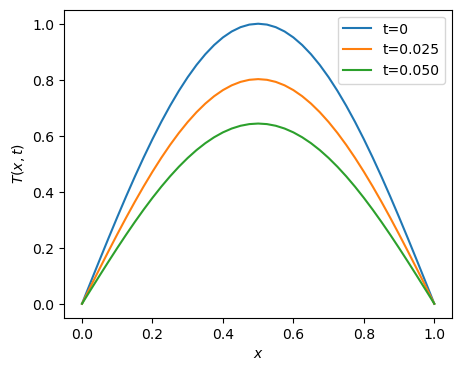

In [19]:
# Figure environment:

plt.figure(figsize=(5,4))

plt.plot(x, T[:, 0], label = 't=0')

plt.plot(x, T[:, 1], label = 't=0.025')

plt.plot(x, T[:, 2], label = 't=0.050')

plt.legend()

plt.xlabel(r"$x$")
plt.ylabel(r"$T(x,t)$")

plt.show()

### In one go:

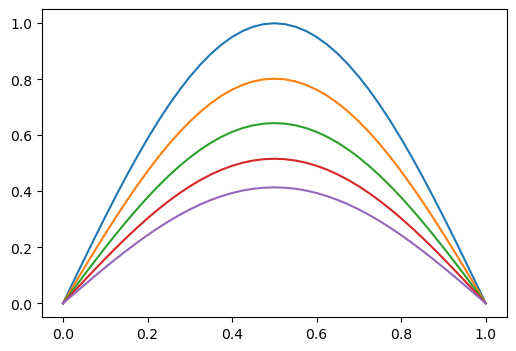

In [20]:
plt.figure(figsize=(6,4))

plt.plot(x, T)

#plt.legend()
plt.show()

#### B. Temperature surface projection:

In [21]:
# Create 2D meshgrid

x_grid, t_grid = np.meshgrid(x, t)

print(x_grid.shape, t_grid.shape, T.T.shape)

(5, 41) (5, 41) (5, 41)


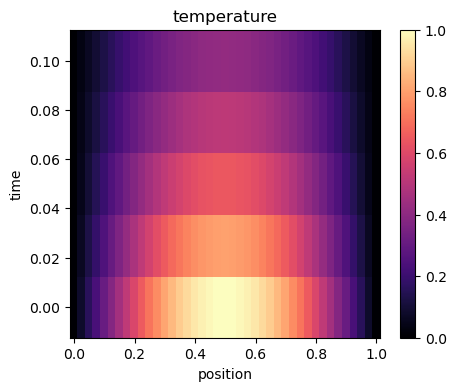

In [24]:
plt.figure(figsize=(5,4))

z_temp = plt.pcolor(x_grid, t_grid, T.T, cmap = 'magma')

plt.xlabel("position")

plt.ylabel("time")

plt.title("temperature")

plt.colorbar(z_temp)

plt.show()

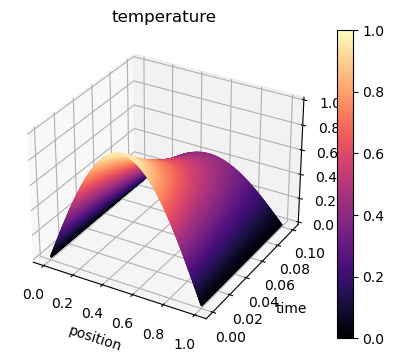

In [26]:
plt.figure(figsize=(5,4))

ax  = plt.axes(projection='3d')

ax.contour3D(x_grid, t_grid, T.T, 500, cmap = 'magma')

plt.xlabel("position")
plt.ylabel("time")

plt.title("temperature")

plt.colorbar(z_temp, ax=ax)

plt.show()